# Can you predict the number of sea turtles Local Ocean Conservation will rescue each week in Kenya?

#### The problem YOU will help us solve!

- Each time a fisherperson catches a turtle they deliver the turtle to LOC researchers and get paid a small remuneration.

- The objective of this challenge is to forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.
#### About the data
You are asked to forecast the number of turtles caught per week for the year 2019 at each capture site. You will train your model on all of the sea turtle capture data from 1998 to 2018.
#### Submission and Evaluation
- The error metric for this competition is the Root Mean Squared Error.


### Packages and libraries

In [1]:
import pandas as pd

### Data importing 

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')

### Data information 

In [3]:
df.head(5)

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [4]:
keep_cols = [
    'Date_TimeCaught',
    'CaptureSite',
    #'ForagingGround',
   # 'Species'
]
df = df[keep_cols].copy()
df.head()

,Date_TimeCaught,CaptureSite
0,2000-12-22,CaptureSite_0
1,2001-10-28,CaptureSite_0
2,2001-11-01,CaptureSite_0
3,2002-03-11,CaptureSite_0
4,2002-08-08,CaptureSite_0


In [5]:
df.Date_TimeCaught = pd.to_datetime(df.Date_TimeCaught)
df['CalendarWeek'] = df['Date_TimeCaught'].dt.isocalendar().week
df['Year'] = df['Date_TimeCaught'].dt.year

In [6]:
df

,Date_TimeCaught,CaptureSite,CalendarWeek,Year
0,2000-12-22,CaptureSite_0,51,2000
1,2001-10-28,CaptureSite_0,43,2001
2,2001-11-01,CaptureSite_0,44,2001
3,2002-03-11,CaptureSite_0,11,2002
4,2002-08-08,CaptureSite_0,32,2002
...,...,...,...,...
18057,2018-12-18,CaptureSite_9,51,2018
18058,2018-12-18,CaptureSite_9,51,2018
18059,2018-12-24,CaptureSite_9,52,2018
18060,2018-12-24,CaptureSite_9,52,2018


In [7]:
df.drop('Date_TimeCaught', axis= 1, inplace=True)

In [8]:
df['Count'] = (
    df.groupby(['CaptureSite', 'Year', 'CalendarWeek'])['Year']
      .transform('size')
)
df = (
    df.groupby(['CaptureSite', 'Year', 'CalendarWeek'])
      .size()
      .reset_index(name='Count')
)


In [9]:
df

,CaptureSite,Year,CalendarWeek,Count
0,CaptureSite_0,2000,51,1
1,CaptureSite_0,2001,43,1
2,CaptureSite_0,2001,44,1
3,CaptureSite_0,2002,11,1
4,CaptureSite_0,2002,32,2
...,...,...,...,...
7952,CaptureSite_9,2018,48,6
7953,CaptureSite_9,2018,49,6
7954,CaptureSite_9,2018,50,12
7955,CaptureSite_9,2018,51,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CaptureSite   7957 non-null   object
 1   Year          7957 non-null   int32 
 2   CalendarWeek  7957 non-null   UInt32
 3   Count         7957 non-null   int64 
dtypes: UInt32(1), int32(1), int64(1), object(1)
memory usage: 194.4+ KB


In [11]:
df.describe()

,Year,CalendarWeek,Count
count,7957.000000,7957.0,7957.000000
mean,2011.277492,27.833229,2.269951
std,4.886923,15.24912,2.178098
min,1998.000000,1.0,1.000000
25%,2008.000000,15.0,1.000000
50%,2012.000000,28.0,1.000000
75%,2015.000000,42.0,3.000000
max,2018.000000,53.0,35.000000


In [12]:
"""
Extract numeric site IDs from strings and convert them
into a categorical (non-ordinal) variable. This prevents the model from treating
site numbers as continuous or ordered values.
"""
df['CaptureSite'] = df['CaptureSite'].astype(str).str.extract(r'(\d+)').astype(int)
df['CaptureSite'] = df['CaptureSite'].astype('category')
df

,CaptureSite,Year,CalendarWeek,Count
0,0,2000,51,1
1,0,2001,43,1
2,0,2001,44,1
3,0,2002,11,1
4,0,2002,32,2
...,...,...,...,...
7952,9,2018,48,6
7953,9,2018,49,6
7954,9,2018,50,12
7955,9,2018,51,5


In [13]:
df.describe()

,Year,CalendarWeek,Count
count,7957.000000,7957.0,7957.000000
mean,2011.277492,27.833229,2.269951
std,4.886923,15.24912,2.178098
min,1998.000000,1.0,1.000000
25%,2008.000000,15.0,1.000000
50%,2012.000000,28.0,1.000000
75%,2015.000000,42.0,3.000000
max,2018.000000,53.0,35.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CaptureSite   7957 non-null   category
 1   Year          7957 non-null   int32   
 2   CalendarWeek  7957 non-null   UInt32  
 3   Count         7957 non-null   int64   
dtypes: UInt32(1), category(1), int32(1), int64(1)
memory usage: 140.9 KB


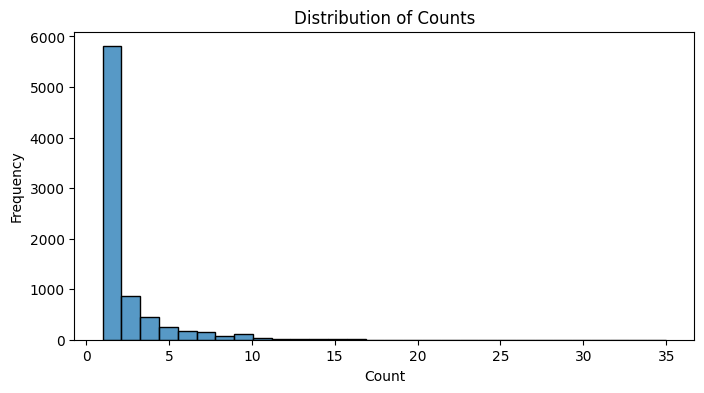

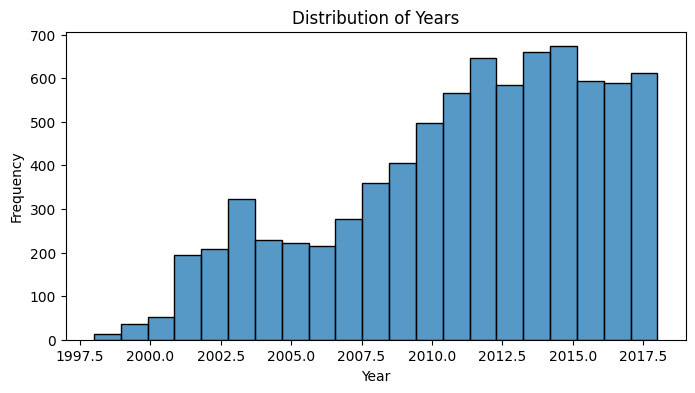

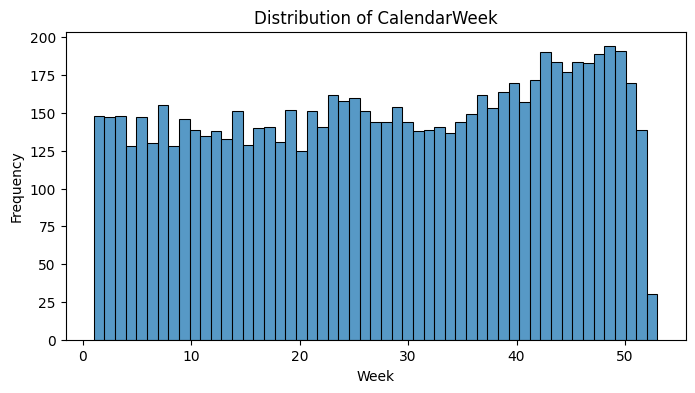

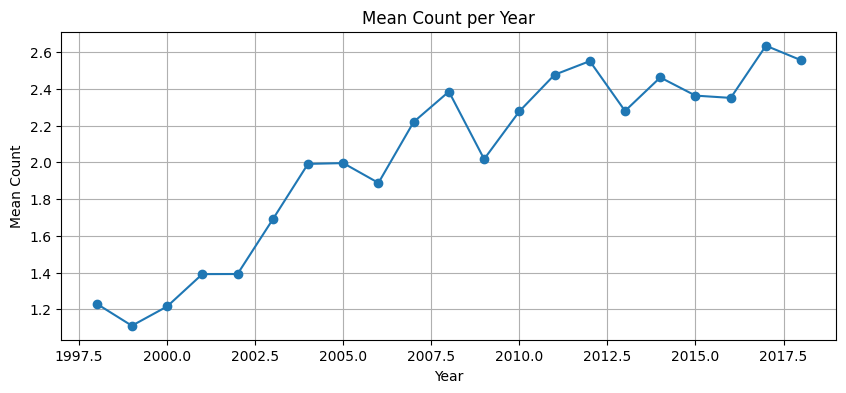

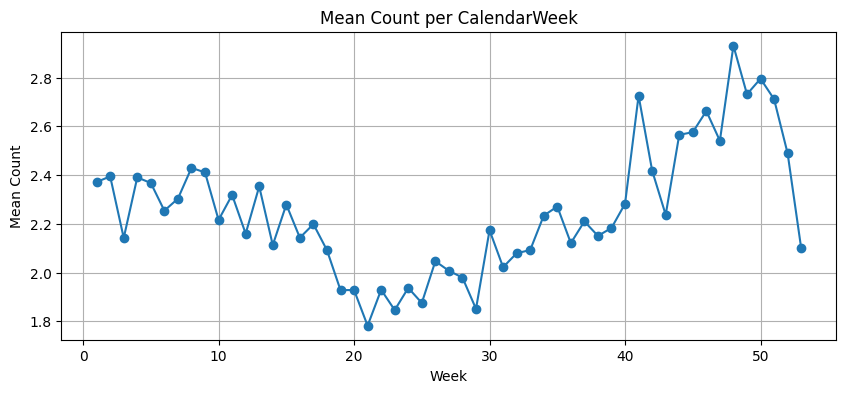

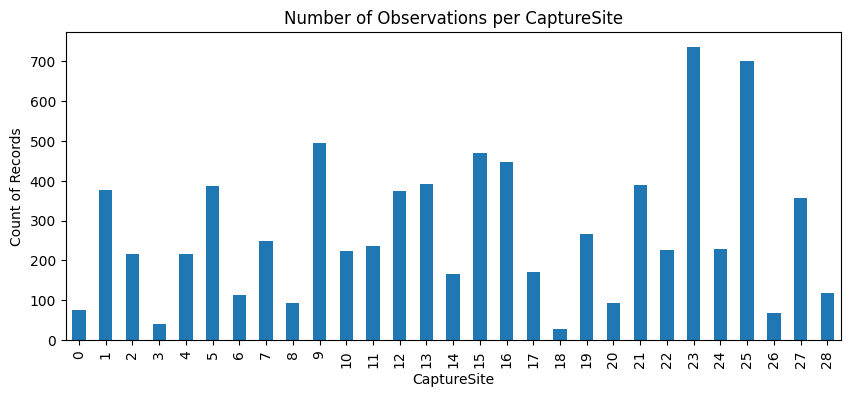

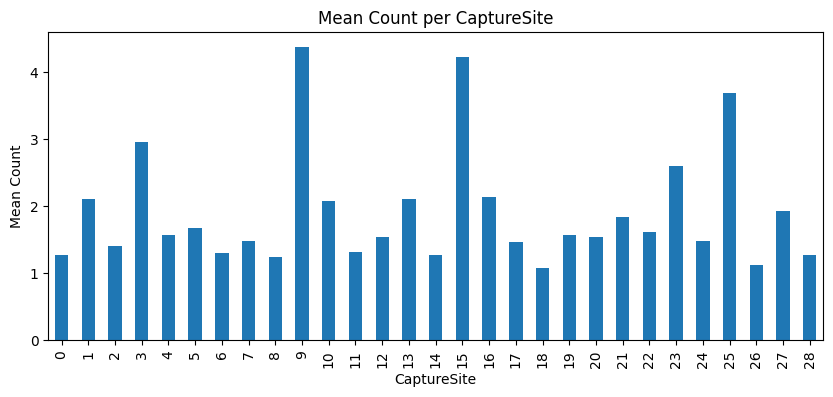

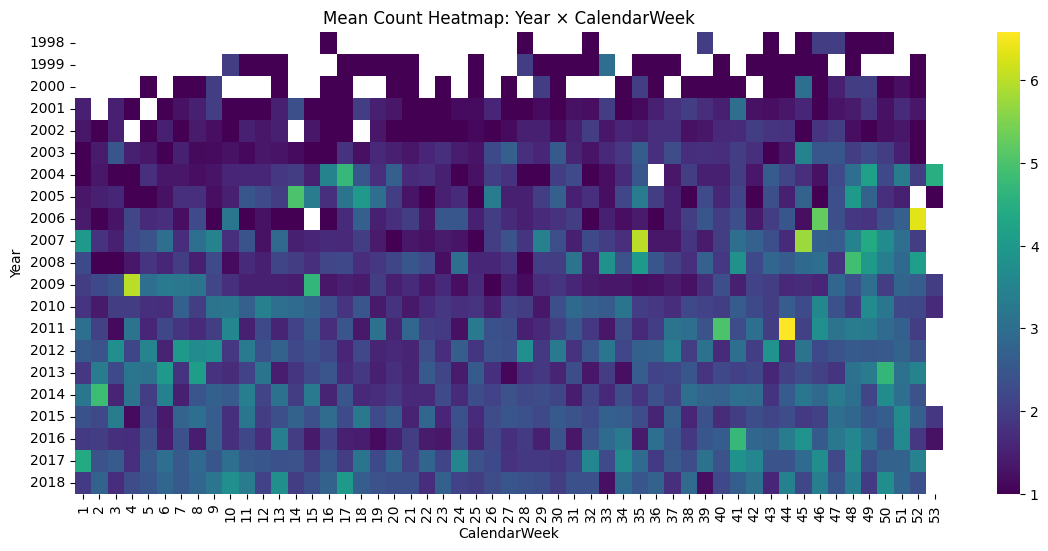

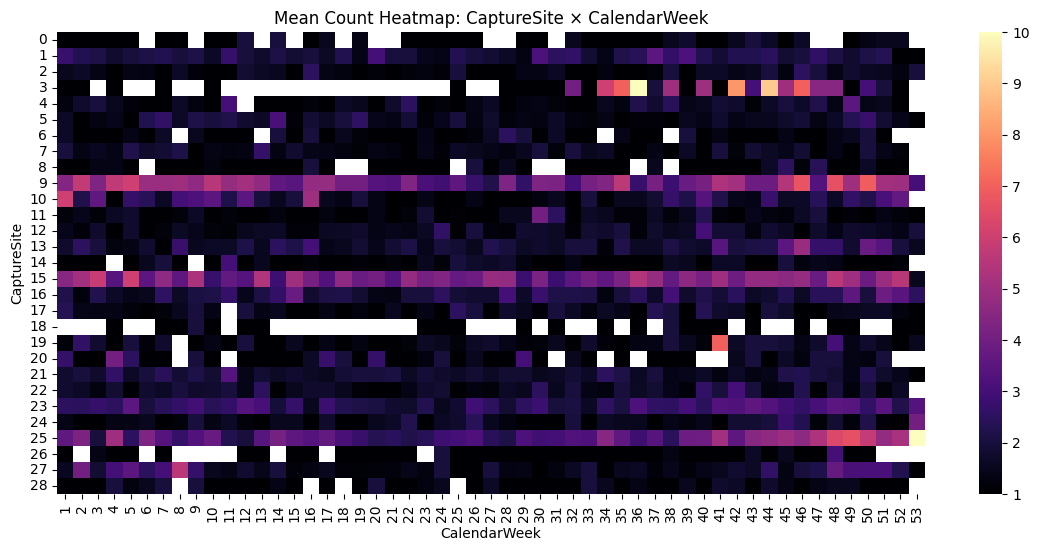

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure CalendarWeek is a regular integer for seaborn
df['CalendarWeek'] = df['CalendarWeek'].astype(int)

# ---------------------------------------------------------------------
# Basic distributions
# ---------------------------------------------------------------------

"""
Distribution of Count values
"""
plt.figure(figsize=(8,4))
sns.histplot(df['Count'], bins=30)
plt.title("Distribution of Counts")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

"""
Distribution of Year values
"""
plt.figure(figsize=(8,4))
sns.histplot(df['Year'], bins=len(df['Year'].unique()))
plt.title("Distribution of Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

"""
Distribution of CalendarWeek
"""
plt.figure(figsize=(8,4))
sns.histplot(df['CalendarWeek'], bins=53)
plt.title("Distribution of CalendarWeek")
plt.xlabel("Week")
plt.ylabel("Frequency")
plt.show()

# ---------------------------------------------------------------------
# Count over time
# ---------------------------------------------------------------------

"""
Average Count per Year
"""
plt.figure(figsize=(10,4))
df.groupby('Year')['Count'].mean().plot(marker='o')
plt.title("Mean Count per Year")
plt.xlabel("Year")
plt.ylabel("Mean Count")
plt.grid(True)
plt.show()

"""
Average Count per CalendarWeek
"""
plt.figure(figsize=(10,4))
df.groupby('CalendarWeek')['Count'].mean().plot(marker='o')
plt.title("Mean Count per CalendarWeek")
plt.xlabel("Week")
plt.ylabel("Mean Count")
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------
# Capture Site
# ---------------------------------------------------------------------

"""
Number of samples per CaptureSite
"""
plt.figure(figsize=(10,4))
df['CaptureSite'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Observations per CaptureSite")
plt.xlabel("CaptureSite")
plt.ylabel("Count of Records")
plt.show()

"""
Mean Count per CaptureSite
"""
plt.figure(figsize=(10,4))
df.groupby('CaptureSite')['Count'].mean().plot(kind='bar')
plt.title("Mean Count per CaptureSite")
plt.xlabel("CaptureSite")
plt.ylabel("Mean Count")
plt.show()

# ---------------------------------------------------------------------
# Heatmaps
# ---------------------------------------------------------------------

"""
Heatmap: Mean Count by Year and CalendarWeek
"""
pivot = df.pivot_table(values='Count',
                       index='Year',
                       columns='CalendarWeek',
                       aggfunc='mean')

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="viridis")
plt.title("Mean Count Heatmap: Year × CalendarWeek")
plt.xlabel("CalendarWeek")
plt.ylabel("Year")
plt.show()

"""
Heatmap: Mean Count by CaptureSite and CalendarWeek
"""
pivot2 = df.pivot_table(values='Count',
                        index='CaptureSite',
                        columns='CalendarWeek',
                        aggfunc='mean')

plt.figure(figsize=(14,6))
sns.heatmap(pivot2, cmap="magma")
plt.title("Mean Count Heatmap: CaptureSite × CalendarWeek")
plt.xlabel("CalendarWeek")
plt.ylabel("CaptureSite")
plt.show()
